<h2> <center><strong>Ecole Polytechnique de Tunisie</strong> </center> </h2> 
<center><img src="https://nhoues.github.io/Infrastructure-Project/Animations/EPT.jpg" style="width:80px;height:80px"  ></center>


<h1><center>Théorie Numérique du Signal</center></h1>
<h1><center><em>Compte rendu du mini-projet : </em></center></h1>
<h2><em><center>Modélisation des signaux audio et annulation de bruit (Noise Cancellation).</em></center></h2>
<h3><center><em>Réalisé par :</em> <font color='blue'> Naim Houes & Malek Mechergui</font></center></h3> 


## Introduction :
Dans ce mini-projet, il s’agit de tester le filtrage de Wiener en annulation de bruit et de modéliser un signal audio à l’aide d’un processus AR, comme opération de pré-traitement pour la compression audio. 

### Partie A :  Annulation de bruit 


Dans cette partie nous allons générer un filtre de Wiener qui à partir de $𝑣_2(𝑛)$ va estimer un signal $𝑣̂_1(𝑛)$ très proche de $𝑣_1(𝑛)$ au sens de l'EQMM (Erreur Quadratique Moyenne Minimale). Ce signal estimé ($𝑣̂_1(𝑛)$) va débrouiller le signal $𝑥(𝑛)$ et éliminer le bruit ajouté initialement à $𝑑(𝑛)$ qui n'est autre que $𝑣_1(𝑛)$.

###### A.1  Le schéma synoptique de cette application

<img src=" https://nhoues.github.io/Infrastructure-Project/Animations/wiener.PNG" style="width:500px;height:250px" >



###### A.2 Le vecteur des coefficients du filtre de Wiener optimal de type RIF

D'après l'equation de Wiener-Hoph : $R\:h_{opt}=p$ $⇔$ $h_{opt}=R^{-1}p$

###### A.3 Les autocorrélations mises en jeu dans les équations de Wiener-Hopf 


- La matrice d'autocorrelation de $𝑣_2(𝑛)$ est par définition : $R = E(𝑣_2(n)\:𝑣^{H}_{2}(n))$. 


- Le vecteur d'intercorrelation entre le bruit d'entrée $𝑣_2(n)$ et le bruit désiré $𝑣_1(n)$ est par définition : $p=E(𝑣_2(n)\:x(n))$.

###### A.4 Génération des deux bruits $𝑣_1$ et $𝑣_2$

$$𝑣_1(𝑛) = 0.8\:𝑣_1(𝑛 − 1) + 𝑔(𝑛)$$

$$𝑣_2(𝑛) = −\:0.6\:𝑣_2(𝑛 − 1) + 𝑔(𝑛)$$ 

où $g(n)$ un bruit blanc qui suit la loi normale $N(0,1)$

Importer les bibliothèques nécessaires au travail.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import signal as sp

random.seed(5) 
np.random.seed(5)

In [0]:
N = 500 #nbre d'échantillons
#le bruit blanc
g = np.random.normal(0, 1, N)

In [0]:
#Génération de 𝑣_1

def v1(n,g):
    l=[]
    #init
    l.append(g[0])
    for i in range(1,n) : 
        l.append(0.8*l[i-1]+g[i])
        
    return l

#Génération de 𝑣_2

def v2(n,g):
    l=[]
    #init
    l.append(g[0])
    for i in range(1,n) : 
        l.append(-0.6*l[i-1]+g[i])
        
    return l 

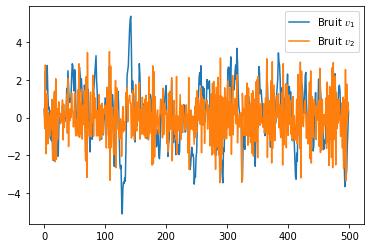

In [5]:
V1 = v1(N,g)
V2 = v2(N,g)
plt.plot(V1, label="Bruit $𝑣_1$")
plt.plot(V2, label="Bruit $𝑣_2$") 
plt.legend()
plt.show()

###### A.5 Gneration du signal utile sinusoidal 𝑑(𝑛)  de pulsation $w_0 = 0.05\pi$ et de phase de $\phi$ et du signal correspondant 𝑥(𝑛)

$$d(n) = sin(w_0 n+\phi)$$

$$x(n) = d(n)+v_1(n)$$

In [0]:
#Génération de d(n)

def d(n,w0,phi):
    return(np.sin(w0*n+phi))

#Signal d'entrée

l = np.arange(N)
input_signal = d(l,0.05*np.pi,0)

#signal bruité

x = input_signal + V1

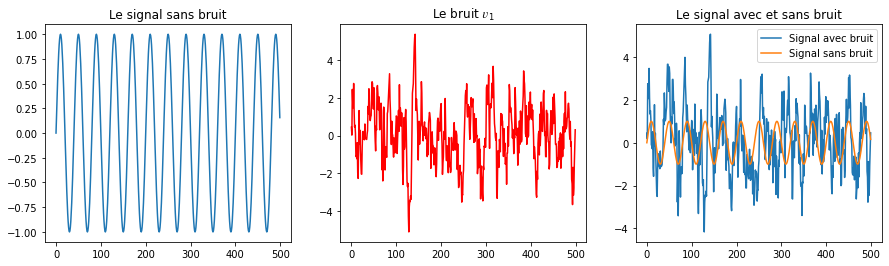

In [7]:
plt.figure(figsize=(15,4))

plt.subplot(131)
plt.plot(l, input_signal)
plt.title("Le signal sans bruit")

plt.subplot(132)
plt.plot(l,V1,c = 'r')
plt.title("Le bruit $𝑣_1$")

plt.subplot(133)
plt.plot(l, x,label='Signal avec bruit')
plt.plot(l,input_signal, label='Signal sans bruit')
plt.legend()
plt.title('Le signal avec et sans bruit') 



plt.show()

###### A.6 Implémentation du filtre de Wiener, test des compétences et annulation du bruit pour les ordres $P=6$ et $P=12$ 

Pour estimer la matrice d'autocorrélation $R$ nous avons opté pour l'expression suivante :

\begin{equation*}
R_{v_2v_2} = 
\begin{bmatrix}
r(0) & r(1)  &...& r(P-1) \\
r(1) & r(0)  &... & r(P-2)\\
. & .  &...& . \\ 
. & .  &...& . \\ 
. & . &...& . \\ 
r(P-1)& r(P-2) & ... & r(0)  
\end{bmatrix}
\end{equation*}


 
Avec : \begin{equation*} r(k) = \sum_{n=0}^{N} v_2(n)\:v_2(n+k) \end{equation*}


In [0]:
def autocorrelation(x,n):
    x_std = x.std()
    A = np.zeros((len(x)-n,n))
    for m in range(len(x)-n) : 
        A[m,:] = x[m+np.arange(n)].T 
    
    R = np.dot(A.T,A)
    
    return R

Pour estimer le vecteur d'intercorrélation $p$ nous avons opté pour l'expression suivante :

\begin{equation*}
p_{v_2v_1} = 
\begin{bmatrix}
r(0)  \\
r(1) \\
.\\ 
. \\ 
r(P-1)
\end{bmatrix}
\end{equation*}
 
 
Avec : 
\begin{equation*} r(k) = \sum_{n=0}^{N} v_2(n)\:x(n+k) \end{equation*}

In [0]:
def inter_correlation(x,y,n):
    
    A = np.zeros((len(x)-n,n))
    for m in range(len(x)-n) : 
        A[m,:] = x[m+np.arange(n)].T
    p = np.dot(A.T,y[n:])
    
    return p


Détermination des paremètres optimaux du filtre de Wiener $(h_{opt}=R^{-1}p)$

In [0]:
def calcul_hopt(n):
    
    R = autocorrelation(np.array(V2), n)
    R1 = np.linalg.inv(R)
    p = inter_correlation(np.array(V2),np.array(x), n)
    hopt = np.dot(R1,p)
    
    return hopt

###### Analyse temporelle 

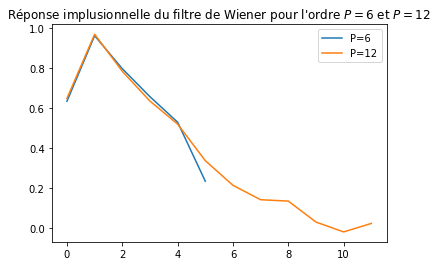

In [11]:
#h_opt pour l'ordre du filtre P=6
hopt_6 = calcul_hopt(6)

#Estimation de 𝑣̂_1 par un filtre de Wiener d'ordre P=6
v1_hat_6 = sp.lfilter(np.flipud(hopt_6).T,[1],V2)

#Estimée de 𝑥 par 𝑣̂_1(P=6)
x_hat_6 = x - v1_hat_6

#h_opt pour l'ordre du filtre P=12
hopt_12 = calcul_hopt(12)

#Estimation de 𝑣̂_1 par un filtre de Wiener d'ordre P=12
v1_hat_12 = sp.lfilter(np.flipud(hopt_12).T,[1],V2)

#Estimée de 𝑥 par 𝑣̂_1(P=12)
x_hat_12 = x - v1_hat_12

plt.plot(np.flipud(hopt_6),label='P=6') 
plt.plot(np.flipud(hopt_12),label='P=12') 
plt.legend()
plt.title("Réponse implusionnelle du filtre de Wiener pour l'ordre $P=6$ et $P=12$")

plt.show()

###### Interpretations :

On constate que pour l'ordre 6 et l'ordre 12, nous avons un pic au niveau du coefficient d'ordre 1 du filtre. Ce pic engendre un retard de 1 échantillon. 

###### Analyse fréquentielle

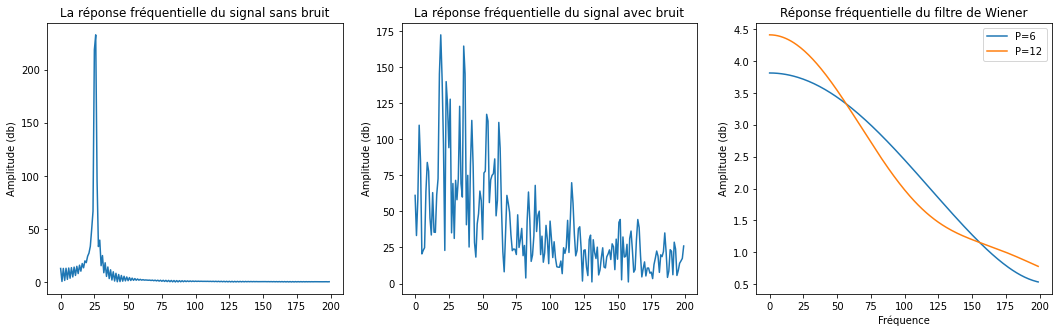

In [12]:
spectre_filter_6 = sp.freqz(np.flipud(hopt_6)) #TF
spectre_filter_12 = sp.freqz(np.flipud(hopt_12)) 

spectre_signal_avec_bruit = sp.freqz(x)
spectre_signal_sans_bruit = sp.freqz(input_signal)

plt.figure(figsize=(18,5))

plt.subplot(131)
plt.plot(abs(spectre_signal_sans_bruit[1])[:200])
plt.title('La réponse fréquentielle du signal sans bruit')
plt.ylabel('Amplitude (db)')

plt.subplot(132)
plt.plot(abs(spectre_signal_avec_bruit[1])[:200] ) 
plt.title('La réponse fréquentielle du signal avec bruit')
plt.ylabel('Amplitude (db)')

plt.subplot(133)
plt.plot(abs(spectre_filter_6[1])[:200], label="P=6") 
plt.plot(abs(spectre_filter_12[1])[:200], label="P=12")
plt.legend()
plt.title('Réponse fréquentielle du filtre de Wiener')
plt.xlabel('Fréquence')
plt.ylabel('Amplitude (db)')

plt.show()

###### Interpretations
On constate que pour l'ordre $P=6$ et $P=12$ du filtre de Wiener implémenté, la réponse fréquentielle est plus importante pour les basses fréquences. Donc il s'agit d'un filtre passe bas, qui laisse passer les basses fréquences.
Ceci est due au fait que notre signal d'origine (sans bruit) a un pic à une fréquence basse. Mais avec le bruit ajouté, la réponse fréquentielle du signal bruité possède plusieurs composantes pour differentes valeurs de fréquences.

On remarque que pour $P = 12$, la réponse fréquentielle du filtre est plus aigue que pour $P = 6$, ce qui fait que le filtre d'ordre 12 filtrera mieux le bruit que le filtre d'ordre 6.


###### Estimation du signal désiré  d(n)

Dans cette partie nous allons voir l'efficacité des deux filtres (d'ordre 6 et d'ordre 12) à débruiter le signal 𝑥(𝑛) et de voir ce signal sans bruit estimé par rapport au signal désiré d(n).

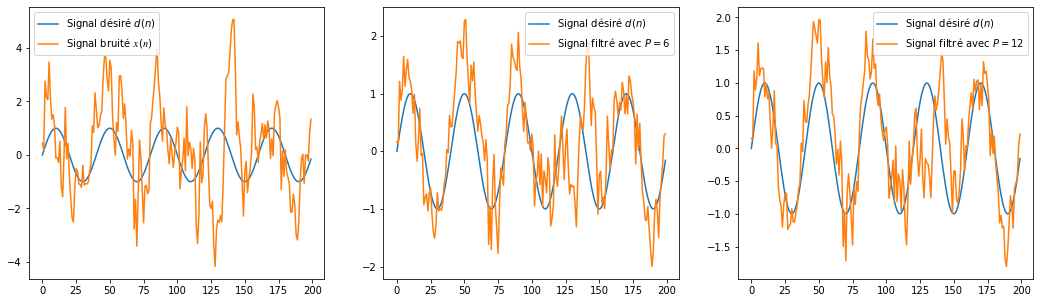

In [13]:
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(input_signal[:200],label='Signal désiré $d(n)$')
plt.plot(x[:200],label="Signal bruité $𝑥(𝑛)$")
plt.legend()

plt.subplot(132)
plt.plot(input_signal[:200],label='Signal désiré $d(n)$')
plt.plot(x_hat_6[:200],label="Signal filtré avec $P=6$")
plt.legend()

plt.subplot(133)
plt.plot(input_signal[:200],label='Signal désiré $d(n)$')
plt.plot(x_hat_12[:200],label="Signal filtré avec $P=12$")
plt.legend()

plt.show()

In [14]:
rmse_6 = np.sqrt(((x_hat_6-input_signal)**2).sum())/N
rmse_12 = np.sqrt(((x_hat_12-input_signal)**2).sum())/N

print("L'erreur quadratique moyenne pour le filre d'ordre P=6 = ",rmse_6)
print("L'erreur quadratique moyenne pour le filre d'ordre P=12 = ",rmse_12)

L'erreur quadratique moyenne pour le filre d'ordre P=6 =  0.029291754567017336
L'erreur quadratique moyenne pour le filre d'ordre P=12 =  0.024653489763691895


###### Partie test du filtre

In [19]:
np.random.seed(7)

g = np.random.normal(0, 1, N)
V1 = v1(N,g)
V2 = v2(N,g)

x1 = input_signal + V1

v1_hat_6 = sp.lfilter(np.flipud(hopt_6).T,[1],V2)
x1_hat_6 = x1 - v1_hat_6

v1_hat_12 = sp.lfilter(np.flipud(hopt_12).T,[1],V2)
x1_hat_12 = x1 - v1_hat_12

rmse_6 = np.sqrt(((x1_hat_6-input_signal)**2).sum())/N
rmse_12 = np.sqrt(((x1_hat_12-input_signal)**2).sum())/N

print("L'erreur quadratique moyenne pour le filre d'ordre P=6 = ",rmse_6)
print("L'erreur quadratique moyenne pour le filre d'ordre P=12 = ",rmse_12)


L'erreur quadratique moyenne pour le filre d'ordre P=6 =  0.029249505151720527
L'erreur quadratique moyenne pour le filre d'ordre P=12 =  0.024998183792961537


Dans cette partie test, nous allons regénérer de nouveau les bruits $𝑣_1$ et $𝑣_2$ pour tester les performances et la robustesse de notre filtre. 
Nous avons remarqué que l'EQM a augementé légèrement  par rapport à la partie "train" du filtre. Ce qui montre que l'efficacité du filtre de wiener .  

###### Calcul de $h_{opt}$ avec l'algorithme du gradient déterministe

In [17]:
epsilon = 10**(-6)
mu = 10**(-6) #( < 2/lambdamax)
h_n = np.random.normal(0,1,12)

R = autocorrelation(np.array(V2), 12)
p = inter_correlation(np.array(V2),np.array(x), 12)

n=0
while (np.linalg.norm(p-np.dot(R,h_n))< epsilon) : 
    h_n  = h_n + mu * (p-np.dot(R,h_n))
    n=n+1

v1_hat_gd = sp.lfilter(np.flipud(h_n).T,[1],V2)
x_hat_gd = x - v1_hat_gd

rmse_gd = np.sqrt(((x_hat_gd-input_signal)**2).sum())/N
print("L'erreur quadratique moyenne avec l'algorithme du gradient déterministe par un filre d'ordre P=12 = ",rmse_gd)

L'erreur quadratique moyenne avec l'algorithme du gradient déterministe par un filre d'ordre P=12 =  0.21912194784198263


###### A.6 Teste le filtre de Wiener pour un signal audio *.wav

In [18]:
import IPython 
from scipy.io import wavfile 

#lire le fichier audio
Fs, signal = wavfile.read("Parole1.wav") 
IPython.display.Audio(signal, rate=Fs)

FileNotFoundError: ignored

In [0]:
#taille du signal

s = signal.size

#generation d'un bruit blanc de la taille du signal

g = np.random.normal(0, 1, s)
g = g*2000

V1 = v1(s,g)
V2 = v2(s,g)

signal_bruité = signal + V1

IPython.display.Audio(signal_bruité, rate=Fs)

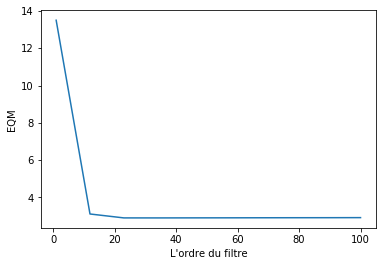

In [0]:
liste = np.linspace(1,100,10,dtype=int)
liste_rmse = []

for i in liste :
    hopt = calcul_hopt(i)
    v1_hat = sp.lfilter(np.flipud(hopt).T,[1],V2)
    signal_hat = signal_bruité - v1_hat
    rmse = np.sqrt(((signal-signal_hat)**2).sum())/s
    liste_rmse.append(rmse)

plt.plot(liste,liste_rmse)
plt.xlabel("L'ordre du filtre")
plt.ylabel("EQM")
plt.show()

On constate que le EQM converge vers son minimum à partir d'un filtre d'ordre au delà de 30

In [0]:
hopt = calcul_hopt(30)
v1_hat = sp.lfilter(np.flipud(hopt).T,[1],V2)
signal_hat = signal_bruité - v1_hat

IPython.display.Audio(signal_hat, rate=Fs)

###### Tester le filtre de Wiener sur une image

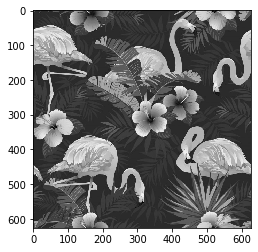

In [0]:
from PIL import Image
import matplotlib.image as mpimg

#rendre la photo en noir & blanc
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = rgb2gray(plt.imread("image22.jpg"))

#normalisation des pixels de l'image
img = img/255

plt.imshow(img, cmap = 'gray')
plt.show()


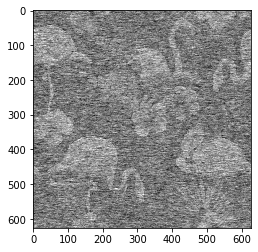

In [0]:
#Bruitage de l'image 

s = img.size
g = 0.2*np.random.normal(0, 1, s)

V1 = v1(s,g)
V2 = v2(s,g)

image_bruité = img + np.array(V1).reshape(img.shape)

plt.imshow(image_bruité, cmap = 'gray')
plt.show()

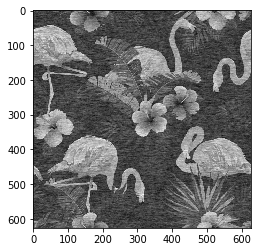

In [0]:
hopt = calcul_hopt(256)

v1_hat = sp.lfilter(np.flipud(hopt).T,[1],V2)
image_hat = image_bruité - np.array(v1_hat).reshape(img.shape)


plt.imshow(image_hat, cmap = 'gray')
plt.show()


### Part B : Modélisation AR d’un signal audio 

On dit qu'un signal x(n) peut etre modélisé par un processus AR s’il obéit à : \begin{equation*} 𝑥(𝑛) = \sum_{l=1}^{P} a(l)\:x(n-l) + 𝑣(𝑛) \end{equation*}

où 𝑣(𝑛) est un bruit blanc, centré, de variance $σ_𝑣²$ et qui est décorrélé de 𝑥(n − k)  ∀ $k≠0$. 
 

###### B.1 Equation aux récurrences  à laquelle obéit l’autocorrélation $r_x(k)$

\begin{equation*}
R_{L+1} = 
\begin{bmatrix}
r(0) & r^T \\
r & R_L\\
\end{bmatrix}
\end{equation*}

avec $$ r = [\: r(1) \: r(2) ... \: r(L) \:] $$

\begin{equation*}
R_{L} = 
\begin{bmatrix}
r(0) &...& r(L-1) \\
. &...& . \\  
r(L-1)& ... & r(0)  
\end{bmatrix}
\end{equation*}

###### B.2 La relation matricielle vérifiée par le vecteur des coefficients du modèle AR, $a_L = [a(0), . . . a(L − 1)]^T $
$$ a_L = R_L^{-1} \: r $$

###### B.3 La puissance du bruit 𝑣(𝑛) en fonction de $r_x(.)$ et a

$$Puissance\:de\:𝑣(𝑛)= r(0) - r^{T}\:a_{L}$$

Nous allons calculer cette puissance dans les questions suivantes.

###### B.4 & B.5 Dans ces question, nous allons identifier le modèle AR du signal sinusoidal généré dans la partie A et nous allons déterminer $a$ pour $P = 2$, $P = 3$, $P = 4$ et $P = 6$. Nous allons également reconstruire la sortie du modèle identifié  $\hat{x}(𝑛)$ et vérifier  avec les plots la similarité avec le signal d'entré $x(n)$.

In [0]:
N = 500
l = np.arange(N)
g = np.random.normal(0, 0.07, N)
input_signal = d(l,0.05*np.pi,0) + g

In [0]:
import pandas as pd 

def AR(x,n,EQM=False) : 
    
    A = np.zeros((len(x)-(n+1),n+1))
    for m in range(len(x)-(n+1)) : 
        A[m,:] = x[m+np.arange(n+1)].T 
  
    df = pd.DataFrame(A)
 
    R_L1 = df.corr().values

    p = R_L1[0,1:]
    R_L = R_L1[1:n+1,1:n+1]
    R_inverse = np.linalg.inv(R_L)

    hopt = np.dot(R_inverse,p)
    
    if EQM : 
        Puissance = R_L[0,0] - np.dot(p,hopt)
        print("La puissance théorique du bruit = ",Puissance)
        

    return hopt

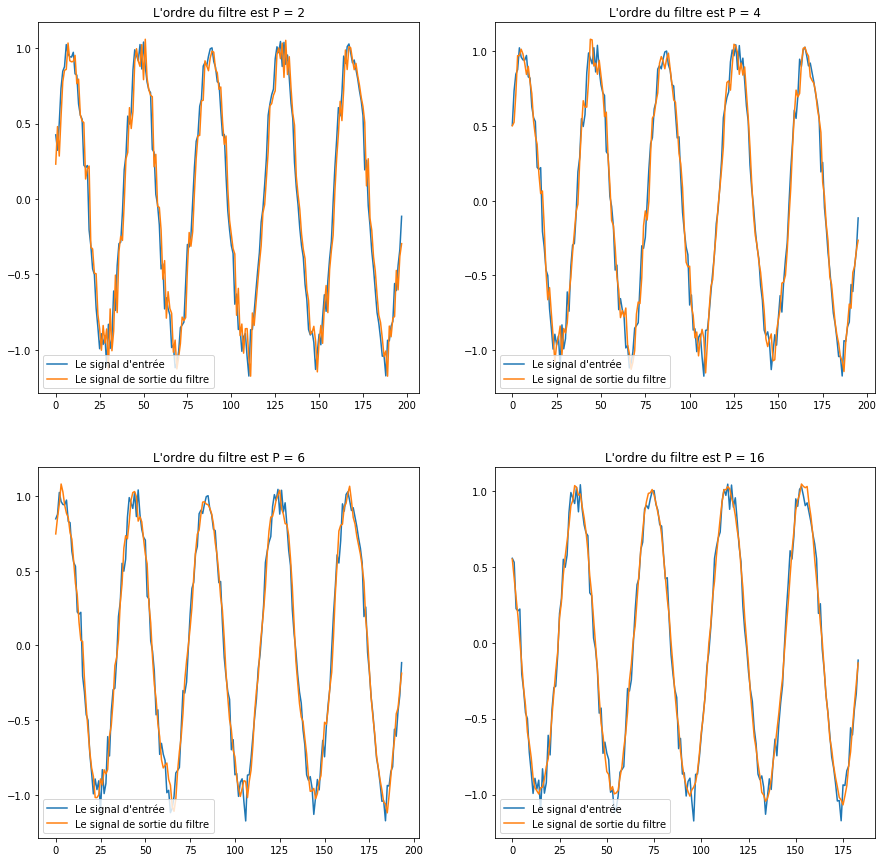

In [0]:
liste_P = [2,4,6,16]
plt.figure(figsize=(15,15))

for i in range(len(liste_P)) :

    
    aopt = AR(input_signal,liste_P[i])
    x_hat = np.zeros(N-liste_P[i])
    for j in range(N-liste_P[i]):
        x_hat[j] = sum(input_signal[j:j+liste_P[i]]*np.flip(aopt))
    
    plt.subplot(221+i)
    plt.plot(input_signal[liste_P[i]:200],label="Le signal d'entrée")
    plt.plot(x_hat[:200-liste_P[i]],label='Le signal de sortie du filtre')
    plt.title("L'ordre du filtre est P = "+str(liste_P[i]))
    plt.legend()
    


  

###### Interpretations
On constate à partir des figures ci-dessus que plus l'ordre du filtre est élévé plus le signal du modèle identifié  $\hat{x}(𝑛)$ tend vers une sinusoid qui n'est autre que le signal désiré $d(n)$. On voit cette covergence à partir de l'ordre $P=6$ du filtre.

###### B.6  Visualisation du bruit de modélisation $𝑣(𝑛) = 𝑥(𝑛) − \hat{x}(𝑛)$ et détermination de sa variance. 

La variance du bruit de modélisation est 0.006 
l'écart type du bruit de modélisation est 0.080 


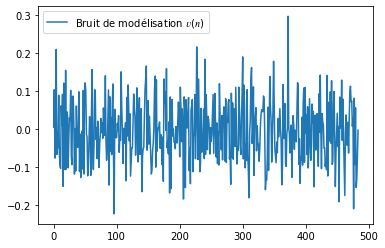

In [0]:
aopt = AR(input_signal,16)
x_hat = np.zeros(N-16)
for j in range(N-liste_P[i]):
    x_hat[j] = sum(input_signal[j:j+16]*np.flip(aopt))

bruit = input_signal[16:] - x_hat

print("La variance du bruit de modélisation est {:.3f} ".format(bruit.var()))
print("l'écart type du bruit de modélisation est {:.3f} ".format(bruit.std()))

plt.plot(bruit,label="Bruit de modélisation $𝑣(𝑛)$")
plt.legend()
plt.show()

###### B.7 Relation entre la variance du bruit obtenu et sa puissance

In [0]:
aopt = AR(input_signal,16,EQM=True)

La puissance théorique du bruit =  0.012494623861944554


On remarque que la puissance théorique du bruit est à peu près égal à deux fois la variance du bruit de modélisation que nous avons calculé.

###### B.8 L'autocorrélation et l'histogramme de $v(n)$

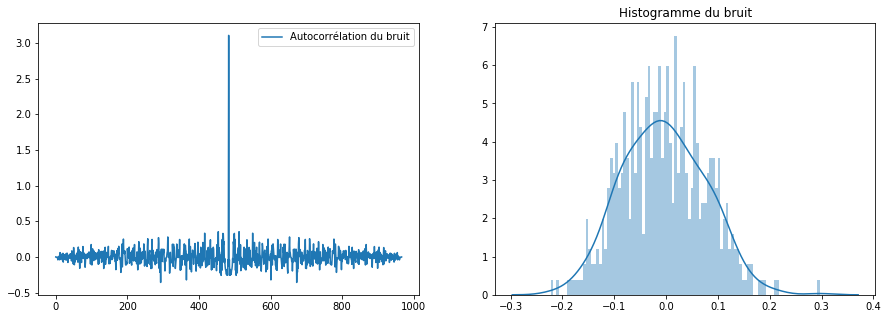

In [0]:
import seaborn as sns
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(np.correlate(bruit,bruit, 'full'),label='Autocorrélation du bruit')
plt.legend()

plt.subplot(122)
sns.distplot(bruit,100)
plt.title('Histogramme du bruit')
plt.show()

plt.show()

Teste de l'hypothese de normalité du bruit : 

-  $H_0$ : Le bruit suit une loi normale.

- $H_A$ : Le bruit ne suit pas une loi normale.

In [0]:
import scipy as sp

sp.stats.ttest_1samp(bruit, popmean = 0)

Ttest_1sampResult(statistic=-1.2361979495170834, pvalue=0.21698581665500546)

###### Interpretations

A partir des figures ci dessus, on constate que le bruit de modélisation suit une loi normale semblable à celle du bruit ajouté initialment au signal (un écart type très proche). 

Nous avons également effectué un test d'hypothèse pour s'assurer de la normalité : Nous avons trouvé que la p-valeur > 0.1 donc on accepte l'hypothese de normalité du bruit ($H_0$).

###### B.9 Le modèle AR sur un signal audio

In [0]:
import IPython 
from scipy.io import wavfile 

#lire le fichier audio
Fs, signal = wavfile.read("Parole1.wav") 
IPython.display.Audio(signal, rate=Fs)

In [0]:
s = signal.size
g = np.random.normal(0, 1, s) 
signal_bruité = signal + g*500
IPython.display.Audio(signal_bruité, rate=Fs)

In [0]:
aopt = AR(input_signal,128)
signal_hat = np.zeros(s-128)

for j in range(s-128):
    signal_hat[j] = sum(signal_bruité[j:j+128]*np.flip(aopt))
    
IPython.display.Audio(signal_hat, rate=Fs)   

###### Interpretations 

Notre modèle AR a donné de l'importance au signal parole et il a éliminé le bruit de fond.